# Compile demographic information

In [17]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

from loader import load, get_formatted_data, get_raw_feature

## Fitbit devices

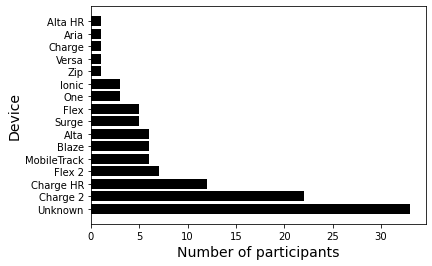

In [2]:
raw_data = get_formatted_data()
devices, device_counts = np.unique(get_raw_feature(raw_data['fitbit'], 'device'), return_counts=True)
devices = ['Unknown' if d == 'np.nan' else d for d in devices]
order = np.argsort(device_counts)[::-1]

plt.barh(np.take(devices, order), np.take(device_counts, order), color='k')
plt.xlabel('Number of participants', fontsize=14);
plt.ylabel('Device', fontsize=14);
# plt.savefig('devices.pdf')

## Personal demographics

Load data:

In [3]:
_, _, survey = load(recent=7, baseline=30)
survey.head()

gender                                                    race        \
     age female male prefer not to say american indian or alaska native asian   
P0  33.0      0    1                 0                                0     0   
P1  35.0      1    0                 0                                0     0   
P2  35.0      1    0                 0                                0     0   
P3  23.0      1    0                 0                                0     0   
P4  35.0      1    0                 0                                0     0   

                                                            ...  \
   black or african american other prefer not to say white  ...   
P0                         0     0                 0     1  ...   
P1                         0     0                 0     1  ...   
P2                         0     0                 0     1  ...   
P3                         0     1                 0     0  ...   
P4                         1     0                 0     1  ...   

                                                         \
   clarity: overall difficulty: free recall (immediate)   
P0                1                                  -1   
P1                2                                   0   
P2                2                                   0   
P3               -2                                  -2   
P4                2                                  -1   

                                                                             \
   difficulty: free recall (delayed) difficulty: vocab learning (immediate)   
P0                                -1                                      1   
P1                                 0                                     -1   
P2                                -1                                      0   
P3                                -2                                      2   
P4                                -1                                     -1   

                                         \
   difficulty: vocab learning (delayed)   
P0                                    1   
P1                                   -2   
P2                                   -1   
P3                                    0   
P4                                    0   

                                             \
   difficulty: spatial learning (immediate)   
P0                                        0   
P1                                       -2   
P2                                       -1   
P3                                       -1   
P4                                        1   

                                                \
   difficulty: naturalistic recall (immediate)   
P0                                           2   
P1                                          -2   
P2                                           2   
P3                                           0   
P4                                           0   

                                                                        \
   difficulty: naturalistic recall (delayed) feedback: number of words   
P0                                         2                        19   
P1                                        -2                         0   
P2                                         2                         0   
P3                                         0                         0   
P4                                         0                         0   

                        
   feedback: sentiment  
P0           -0.996201  
P1                 NaN  
P2                 NaN  
P3                 NaN  
P4                 NaN  

[5 rows x 66 columns]

Define some helper functions to summarize relevant information:

In [4]:
def select_columns(x, k):
    columns = [c for c in x.columns if any(k in x for x in c)]
    return x[columns]

def summarize_values(x, by='column', how='rsum'):
    def metric(y, how, **kwargs):
        if type(how) is list:
            return metric(y, how[0], **how[1])
        
        if how == 'rsum':
            return np.sum(y, axis=0)
        elif how == 'csum':
            return np.sum(y, axis=1)
        elif how == 'hist':        
            vals = [v for v in y.values if not np.isnan(v)]            
            percentiles = kwargs.pop('percentiles', [0, 25, 50, 75, 100])
            return np.percentile(vals, percentiles, interpolation='linear')
        else:
            raise ValueError(f'unknown aggregator: {how}')
    
    if by == 'column':
        for c in x.columns:
            print(f'{c}: {metric(x[c], how)}')
    else:
        raise ValueError(f'unknown method: {by}')

Summarize demographics:

In [5]:
summarize_values(select_columns(survey, 'gender'))

('gender', 'female'): 77
('gender', 'male'): 35
('gender', 'prefer not to say'): 1


In [6]:
summarize_values(select_columns(survey, 'age'), how='hist')

('', 'age'): [19.   28.25 32.   38.   68.  ]
('', 'number fluent languages'): [1. 1. 1. 1. 2.]
('', 'number familiar languages'): [ 1.  1.  2.  3. 11.]


In [7]:
summarize_values(select_columns(survey, 'race'))

('race', 'american indian or alaska native'): 3
('race', 'asian'): 7
('race', 'black or african american'): 11
('race', 'other'): 4
('race', 'prefer not to say'): 1
('race', 'white'): 90


In [8]:
summarize_values(select_columns(survey, 'location'))

('location', 'large city'): 30
('location', 'rural'): 14
('location', 'small city'): 23
('location', 'small town'): 10
('location', 'suburban'): 36


In [9]:
summarize_values(select_columns(survey, 'degree'))

('degree', "associate's degree"): 8
('degree', 'college graduate'): 42
('degree', 'doctorate'): 2
('degree', 'high school graduate'): 9
('degree', "master's degree"): 23
('degree', 'other graduate/professional school'): 5
('degree', 'some college'): 21
('degree', 'some graduate training'): 3


In [10]:
summarize_values(select_columns(survey, 'language'), how='hist')

('', 'number fluent languages'): [1. 1. 1. 1. 2.]
('', 'number familiar languages'): [ 1.  1.  2.  3. 11.]


In [11]:
summarize_values(select_columns(survey, 'stress'), how='hist')

('', 'current stress'): [-2. -2. -1.  1.  2.]
('', 'typical stress'): [-2. -1.  0.  1.  2.]
('', 'current / typical stress'): [nan  0.  1.  1. nan]


/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [12]:
summarize_values(select_columns(survey, 'alert'), how='hist')

('', 'alertness'): [-2.  0.  1.  2.  2.]


In [13]:
summarize_values(select_columns(survey, 'health'))

('health and wellness', 'anxiety or depression'): 4
('health and wellness', 'high blood pressure'): 1
('health and wellness', 'bipolar'): 1
('health and wellness', 'hypothyroid'): 1
('health and wellness', 'unspecified medications'): 1
('health and wellness', 'recent head injury'): 2


In [14]:
summarize_values(select_columns(survey, 'vision'))

('', 'color vision'): 111
('', 'vision impaired'): 15


In [15]:
summarize_values(select_columns(survey, 'water'), how='hist')

('', 'water intake'): [0. 1. 3. 4. 6.]


In [16]:
summarize_values(select_columns(survey, 'coffee'), how='hist')

('', 'coffee intake'): [0. 0. 1. 2. 4.]
